### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Data Set:

- You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

#### Below are the list of datasets which are provided for the analysis:

- Cab_Data.csv – this file includes details of transaction for 2 cab companies
- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
- City.csv – this file contains list of US cities, their population and number of cab users

In [ ]:
# ! pip install holidays
#! pip install pandas-profiling 

In [16]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")


In [58]:
## import the datasets
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [59]:
### Merge the datasets to create one dataframe
df1 = cab.merge(city, on = 'City')
df2 = df1.merge(transaction, on = 'Transaction ID')
df_all = df2.merge(customer, on = 'Customer ID')

### Exploratory Data Analysis

In [60]:
df_all.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [61]:
### checking the datatype
df_all.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [62]:
# Define a function to convert the number of days to a datetime object
def convert_date(days):
    return datetime.date(1900, 1, 1) + datetime.timedelta(days=days)  ### 1900 is used as a referece

# Apply the conversion function to the 'Date of Travel' column and store the result in a new column
df_all['reformatted_date'] = df_all['Date of Travel'].apply(convert_date)
df_all['reformatted_date'] = pd.to_datetime(df_all['reformatted_date'])
df_all['year'] = df_all['reformatted_date'].dt.year


### remove all the white spaces in the columns
df_all.columns = df_all.columns.str.strip()

In [63]:
### change the data type of population and users

df_all['Population'] = df_all['Population'].str.replace(',', "").astype('int64')
df_all['Users'] = df_all['Users'].str.replace(',', "").astype('int64')
df_all.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),reformatted_date,year
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,2016-01-10,2016
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-23,2018
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-25,2018
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,2016-01-08,2016
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-23,2018


In [23]:
## check the statistical summary
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,358879.0,1.022045e+07,1.266361e+05,10000011.0,1.011068e+07,10220779.00,1.033027e+07,10440107.00
Date of Travel,358879.0,4.296335e+04,3.071038e+02,42371.0,4.269700e+04,42987.00,4.323100e+04,43463.00
KM Travelled,358879.0,2.256706e+01,1.223304e+01,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,358879.0,4.235074e+02,2.744381e+02,15.6,2.064650e+02,386.40,5.837550e+02,2048.03
Cost of Trip,358879.0,2.861857e+02,1.579863e+02,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Population,358879.0,3.132216e+06,3.315221e+06,248968.0,6.712380e+05,1595037.00,8.405837e+06,8405837.00
Users,358879.0,1.583689e+05,1.008479e+05,3643.0,8.002100e+04,144132.00,3.021490e+05,302149.00
Customer ID,358879.0,1.919218e+04,2.101326e+04,1.0,2.705000e+03,7459.00,3.608150e+04,60000.00
Age,358879.0,3.533632e+01,1.259429e+01,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),358879.0,1.504921e+04,7.969706e+03,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [24]:
print('Features null value:\n')
df_all.isnull().sum()
#[feature for feature in df_all.columns if df_all[feature].isnull().sum()]

Features null value:



Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
reformatted_date      0
year                  0
dtype: int64

In [25]:
### check if there is a duplicated values
print('dumplcated features:', df_all.duplicated().sum())

dumplcated features: 0


In [44]:
# Check for inconsistencies
inconsistencies = []
for col in df_all.columns:
    if df_all[col].nunique() < 2:
        inconsistencies.append(col) ## Checking for data inconsistencies
print(inconsistencies)   

[]


Highly correlated columns: {'Cost of Trip', 'year', 'Users', 'Price Charged', 'Date of Travel', 'revenue'}


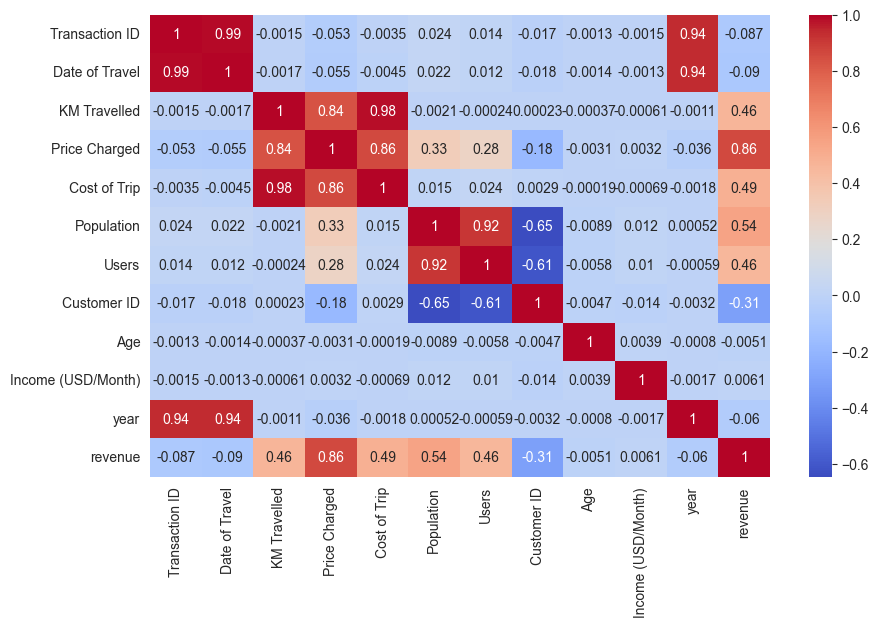

In [38]:
corr = df_all.corr()

# Visualize the correlation matrix\
fig =plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)


# Identify highly correlated pairs
threshold = 0.7
highly_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j]) > threshold:
            colname = corr.columns[i]
            highly_corr.add(colname)

print('Highly correlated columns:', highly_corr)

#### Feature transformation / Adding new features


In [26]:
##  first lets get the profit 
df_all['revenue'] = df_all['Price Charged'] - df_all['Cost of Trip'] 
df_all.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),reformatted_date,year,revenue
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,2016-01-10,2016,57.3150
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,2018-07-23,2018,281.2772
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,2018-11-25,2018,194.6480
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,2016-01-08,2016,23.6660
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,2018-04-23,2018,253.9808


In [64]:
def holidays():
    from datetime import date, timedelta
    import holidays

    us_holidays = holidays.US()

    start_date = date(2016, 1, 31)
    end_date = date(2018, 12, 31)

    holiday_dict = {}
    current_date = start_date
    while current_date <= end_date:
        if current_date in us_holidays:
            holiday_dict[current_date.strftime('%Y-%m-%d')] = us_holidays[current_date]
            
        current_date += timedelta(days=1)
    return holiday_dict
holidays()

{'2016-02-15': "Washington's Birthday",
 '2016-05-30': 'Memorial Day',
 '2016-07-04': 'Independence Day',
 '2016-09-05': 'Labor Day',
 '2016-10-10': 'Columbus Day',
 '2016-11-11': 'Veterans Day',
 '2016-11-24': 'Thanksgiving',
 '2016-12-25': 'Christmas Day',
 '2016-12-26': 'Christmas Day (Observed)',
 '2017-01-01': "New Year's Day",
 '2017-01-02': "New Year's Day (Observed)",
 '2017-01-16': 'Martin Luther King Jr. Day',
 '2017-02-20': "Washington's Birthday",
 '2017-05-29': 'Memorial Day',
 '2017-07-04': 'Independence Day',
 '2017-09-04': 'Labor Day',
 '2017-10-09': 'Columbus Day',
 '2017-11-10': 'Veterans Day (Observed)',
 '2017-11-11': 'Veterans Day',
 '2017-11-23': 'Thanksgiving',
 '2017-12-25': 'Christmas Day',
 '2018-01-01': "New Year's Day",
 '2018-01-15': 'Martin Luther King Jr. Day',
 '2018-02-19': "Washington's Birthday",
 '2018-05-28': 'Memorial Day',
 '2018-07-04': 'Independence Day',
 '2018-09-03': 'Labor Day',
 '2018-10-08': 'Columbus Day',
 '2018-11-11': 'Veterans Day',
 

In [65]:
df_all['Holiday'] = df_all['reformatted_date'].map(holidays()).fillna('Not holiday')